The first part of the code initializes the database that you will need for the last part of the assignment. It also adds some libraries to help with handling your code. If you wish to use more libraries you can add them here. When prompted, you will get a request to allow Google SDK access your google account. Follow the link and accept with your university google account. Copy the verification link. You should see a plot of the PES of H2 if everything was successful.

In [1]:
%pip install netCDF4 
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import math

# from google.colab import drive
# drive.mount('/content/drive/my-drive/Colab_Notebooks/testdata.nc')

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# link = 'https://drive.google.com/file/d/1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF/view?usp=sharing'
# id ='1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('testdata.nc') 
# testdata = 'testdata.nc' 
# ds = nc.Dataset(testdata)

# for var in ds.variables.values():
#     print(var)

# yAxis = []
# xAxis = np.arange(0.25,5.05,0.05)
# for i in range(96):
#   yAxis.append(ds['energy'][i][0:])
  
# plt.ylabel("Ev")
# plt.xlabel("Bond Distance")
# plt.plot(xAxis,yAxis)
# plt.savefig('test_data.png')

     |████████████████████████████████| 4.7MB 4.8MB/s 
     |████████████████████████████████| 317kB 44.5MB/s 


Here we create the training data for the first part of the assignment. The input array will be the input of your network, and you will train the network to predict the output that fits to its respective input. 

In [ ]:
input_array = np.array([[0,0,1],[1,0,1,],[0,1,1],[1,1,1]])
output_array = np.array([[0],[1],[1],[0]])

To start, we will initialize the neural network. 

1.  The size of the input and output nodes is given by your training data above.
 
2.  Create a hidden layer with 4 nodes. 

3.  Create a weighted connection between the input and hidden layer nodes

4.  Create a weighted connection between the hidden layer nodes and output nodes








Write a function that transforms the output of a layer with the sigmoid function. Also write a function that generates the derivative of this function. Finally create a learning rate variable to use in updating the network.


In [29]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def der_sigmoid(x):
    return x * (1.0 - x)
  

With the pieces in place, generate a forward pass of the network. Input each column in the input_array. The network should pass the input to the hidden layers through the weighted connections using the sigmoid function, and from the hidden layers use the connections to reach the ouput node.

Compare the output of your model with each of the training outputs. Subtract the training output from your model output, this is your error. Use this error to calculate the change in the output weights or delta_output. This is calculated by taking the error and multiplying it with the derivative of the output.

Using delta_output, we calculate the change to each of the input layer to hidden layer connections. We multiply delta_output with each of the weighted connections and the derivative of the ouput of each hidden layer. This is the change for each of the input layer to hidden layer weights.

Apply the changes to all of the weights while multipliying them with the learning rate. 




In [54]:
class NeuralNetwork:
    def __init__(self, x, y, nodes):
        self.input = x
        self.output = y
        self.node = nodes
        self.weights1 = np.random.rand(self.input.shape[1],self.node)
        self.weights2 = np.random.rand(self.node,self.output.shape[1])
        self.output_predict = np.zeros(y.shape)
    
    def forward_pass(self):
        self.hidden_layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output_predict = sigmoid(np.dot(self.hidden_layer1, self.weights2))

    def backward_feed(self):
        self.error = self.output -self.output_predict
        self.square_error = np.square(self.error)
        d_weights2 = np.dot(self.hidden_layer1.T, 2 * self.error * der_sigmoid(self.output_predict))
        d_weights1 = np.dot(self.input.T, np.dot(2 * self.error * der_sigmoid(self.output_predict), self.weights2.T)* der_sigmoid(self.hidden_layer1))
        # update the weights
        self.weights1 += d_weights1
        self.weights2 += d_weights2



We now repeat this process for 10.000 epochs. Check if the error of the model is decreasing over time and aproaches 0. If this the case the model is working and we can apply to the PES data.

In [ ]:
input_array = np.array([[0,0,1],[1,0,1,],[0,1,1],[1,1,1]])
output_array = np.array([[0],[1],[1],[0]])

nn=NeuralNetwork(input_array,output_array)
error_list=[]
for i in range(10000):
    nn.forward_pass()
    nn.backward_feed()
    error_list.append(nn.error)
# print(error_list)
print(nn.output_predict)

# print(error_array.shape)

[[0.00334806]
 [0.9923788 ]
 [0.99248393]
 [0.00833647]]


In [ ]:
error_array = np.array(error_list)
error_array = error_array.reshape(10000,4)
print(error_array.shape)

(10000, 4)


(10000,)


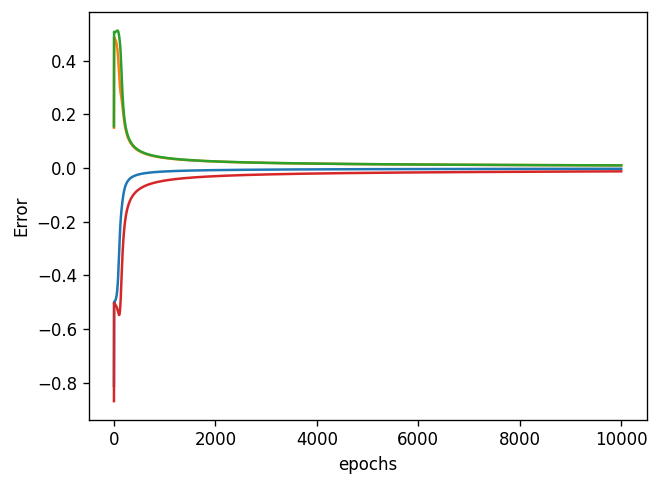

In [ ]:
plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, error_array)
# plt.ylim(-0.01,0.01)
plt.xlabel('epochs')
plt.ylabel("Error")
# plt.savefig("error_epochs_training_set.png",dpi=120)
plt.show()


Analyze the model using cost function:
 
here use the mean square error

In [ ]:
# CALCUALTE THE MEAN SQUARE ERROR 

input_array = np.array([[0,0,1],[1,0,1,],[0,1,1],[1,1,1]])
output_array = np.array([[0],[1],[1],[0]])

nn=NeuralNetwork(input_array,output_array)
mse=[]
for i in range(10000):
    nn.forward_pass()
    nn.backward_feed()
    mse.append(nn.square_error.mean())
rmse = [math.sqrt(i) for i in mse]
print(rmse)
print(nn.output_predict)

[0.6260371362314721, 0.5705209664125648, 0.5068242314151068, 0.49840054631671243, 0.49818473901410776, 0.49809926721442627, 0.49801670471795273, 0.49793192931703856, 0.49784463119351124, 0.4977546872287121, 0.49766197700777076, 0.49756637556651157, 0.49746775273077776, 0.4973659728132742, 0.49726089428907005, 0.49715236946066566, 0.4970402441074052, 0.49692435712036004, 0.49680454012268915, 0.4966806170758687, 0.4965524038722437, 0.4964197079144941, 0.4962823276827357, 0.4961400522901097, 0.4959926610278479, 0.49583992290093787, 0.49568159615564084, 0.49551742780024594, 0.4953471531205689, 0.49517049519181816, 0.49498716438856627, 0.49479685789466543, 0.49459925921504605, 0.4943940376914328, 0.4941808480241054, 0.49395932980192875, 0.4937291070429914, 0.49348978774831337, 0.4932409634712527, 0.4929822089054355, 0.49271308149430665, 0.49243312106573217, 0.4921418494955268, 0.49183877040433654, 0.4915233688929998, 0.4911951113223771, 0.4908534451446782, 0.490497798794566, 0.4901275816497

(10000,)


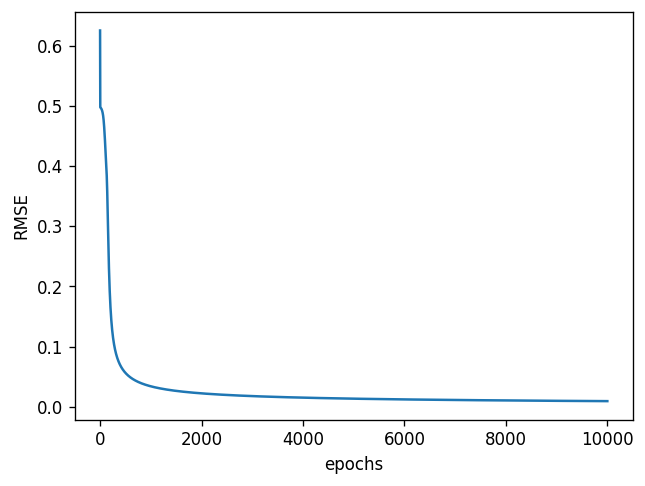

8.427014253246541e-05


In [ ]:
### PLOT MSE VS epochs

plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()
print(mse[-1])

The following code checks if the database data is working and creates an input and output array based on this data. 


# testing set

(96, 1)
(96, 3)
(96, 3)


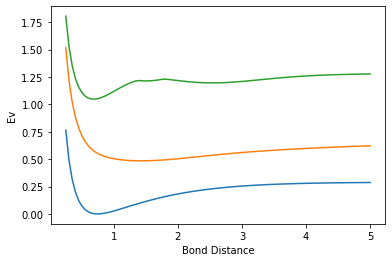

In [2]:
fn = '/content/testdata.nc'
ds = nc.Dataset(fn)

yAxis = []
xAxis = np.arange(0.25,5.05,0.05)
for i in range(96):
  yAxis.append(ds['energy'][i][0:])

# print(yAxis)  
yAxisMin= np.amin(yAxis)
yAxis = yAxis-yAxisMin
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)
# plt.savefig('test_data.png')

input_array = np.reshape(xAxis, (-1, 1))
output_array = yAxis

print(input_array.shape)
print(output_array.shape)
# print(input_array)
print(output_array.shape)

## test1: remove sigmoid function

Change the shape of the network to fit the training. Run the network and see how well it is performing. To improve performance, consider changing the number of hidden layers, the amount of epochs and the learning rate. Try to find the best parametres to estimate the data.

In [7]:
class NeuralNetwork4h2:
    '''
    one hidden layer
    '''
    def __init__(self, x, y, Nodes, Learn, Bias):
        self.input = x
        self.output = y
        self.node = Nodes
        self.learn = Learn
        self.bias = Bias
        self.weights1 = np.random.rand(self.input.shape[1],self.node)
        self.weights2 = np.random.rand(self.node,self.output.shape[1])
        self.output_predict = np.zeros(y.shape)
    
    def forward_feed(self):
        self.hidden_layer1 = np.dot(self.input, self.weights1)
        self.output_predict = np.dot(self.hidden_layer1, self.weights2)

    def back_propagation(self):
        self.error =  self.output - self.output_predict
        self.square_error = np.square(self.error)
        d_weights2 = np.dot(self.hidden_layer1.T, 2 * self.error * self.output_predict)
        d_weights1 = np.dot(self.input.T, np.dot(2 * self.error, self.weights2.T))
        # update the weights
        self.weights1 -= d_weights1
        self.weights2 -= d_weights2

In [ ]:
EPOCHS=1000
NODES=96
error_list_h2 = []
nn_h2=NeuralNetwork4h2(input_array,output_array,16, 0.1, 0.5)

for i in range(2):
    nn_h2.forward_feed()
    nn_h2.back_propagation()
    error_list_h2.append(nn_h2.error)

print(nn_h2.output_predict)

In [ ]:
print(error_list_h2)

In [14]:
error_array_h2 = np.array(error_list)
error_array_h2 = error_array_h2.reshape(1000,3)
print(error_array_h2.shape)

# plt.figure(figsize=(8,4),dpi=120)
# epochs = np.linspace(0,EPOCHS,EPOCHS)
# print(epochs.shape)
# plt.plot(epochs, error_array)
# # plt.ylim(-0.01,0.01)
# plt.xlabel('epochs')
# plt.ylabel("Error")
# # plt.savefig("error_epochs_testing_set.png",dpi=120)
# plt.show()

NameError: ignored

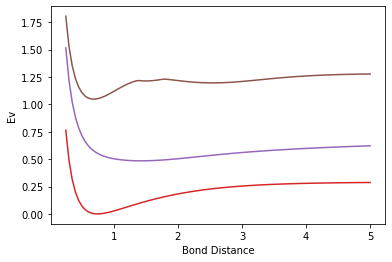

(96,)
(96, 3)
(96, 3)


In [ ]:
# xAxis = input_array
yAxis_predict = h2.output_predict
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis_predict, '--')
plt.plot(xAxis,yAxis, '-')
plt.show()
print(xAxis.shape)
print(yAxis.shape)
print(yAxis_predict.shape)

## test2: normalize the input data and output data




In [47]:
input_scaler = input_array.max()
input_norm = input_array/input_array.max()
input_norm
output_scaler = output_array.max()
output_norm = output_array/output_array.max()
output_norm
print(output_norm.max())

1.0


In [43]:
class NeuralNetwork_test2:
    def __init__(self, x, y, Nodes, Learn, Bias):
        self.input = x
        self.output = y
        self.node = Nodes
        self.learn = Learn
        self.bias = Bias
        self.weights1 = np.random.rand(self.input.shape[1],self.node)
        self.weights2 = np.random.rand(self.node,self.output.shape[1])
        self.output_predict = np.zeros(y.shape)
    
    def forward_feed(self):
        self.hidden_layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output_predict = sigmoid(np.dot(self.hidden_layer1, self.weights2))

    def back_propagation(self):
        self.error = self.output -self.output_predict
        self.square_error = np.square(self.error)
        d_weights2 = np.dot(self.hidden_layer1.T, 2 * self.error * der_sigmoid(self.output_predict))
        d_weights1 = np.dot(self.input.T, np.dot(2 * self.error * der_sigmoid(self.output_predict), self.weights2.T)* der_sigmoid(self.hidden_layer1))
        # update the weights
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [55]:
nn=NeuralNetwork(input_norm,output_norm,16)
error_list=[]
for i in range(10000):
    nn.forward_pass()
    nn.backward_feed()
    error_list.append(nn.error)
# print(error_list)
print(nn.output_predict)

# print(error_array.shape)

[[0.47735119 0.87410493 0.91180084]
 [0.29156201 0.80389252 0.82315297]
 [0.1766166  0.72416693 0.71778066]
 [0.11316233 0.6443346  0.62164125]
 [0.07850121 0.57180117 0.54914708]
 [0.05899601 0.51026173 0.5015826 ]
 [0.04761689 0.46033717 0.47439708]
 [0.0408059  0.42095061 0.46218332]
 [0.03671075 0.39041231 0.46037491]
 [0.03432392 0.36701145 0.46547168]
 [0.03307077 0.34925681 0.4748722 ]
 [0.03260788 0.33593385 0.48667389]
 [0.03272076 0.32608473 0.49951421]
 [0.03326993 0.31896453 0.51244889]
 [0.03416125 0.31399633 0.52485469]
 [0.0353291  0.31073268 0.53634945]
 [0.03672642 0.30882503 0.54672639]
 [0.03831872 0.30800031 0.55590161]
 [0.0400802  0.30804314 0.56387344]
 [0.04199132 0.3087826  0.57069224]
 [0.0440371  0.31008215 0.57643869]
 [0.046206   0.31183207 0.58120882]
 [0.04848904 0.31394371 0.58510391]
 [0.0508792  0.31634506 0.58822413]
 [0.05337098 0.31897737 0.59066465]
 [0.05596002 0.32179247 0.59251351]
 [0.05864285 0.32475075 0.59385063]
 [0.0614166  0.32781946 0.59

In [56]:
output_predict_test2 = nn.output_predict * output_scaler
print(output_predict_test2)


[[0.86096698 1.57656563 1.64455526]
 [0.52587123 1.44992812 1.48466693]
 [0.31855175 1.30613231 1.29461381]
 [0.20410346 1.16214398 1.12121348]
 [0.14158747 1.0313202  0.9904605 ]
 [0.10640723 0.92032556 0.90467157]
 [0.08588345 0.83027991 0.85563883]
 [0.07359892 0.75924096 0.83360969]
 [0.06621276 0.70416103 0.83034797]
 [0.0619078  0.66195443 0.83954069]
 [0.05964758 0.62993156 0.85649578]
 [0.05881268 0.60590181 0.87778171]
 [0.05901629 0.58813759 0.90094096]
 [0.0600068  0.57529536 0.92427039]
 [0.06161441 0.56633454 0.94664592]
 [0.06372077 0.56044811 0.96737826]
 [0.06624103 0.55700742 0.98609447]
 [0.06911295 0.55551991 1.00264321]
 [0.07229002 0.55559717 1.01702148]
 [0.07573698 0.55693088 1.02932009]
 [0.07942683 0.55927479 1.0396846 ]
 [0.08333873 0.56243101 1.04828816]
 [0.08745649 0.56623964 1.05531348]
 [0.09176747 0.5705708  1.06094121]
 [0.09626173 0.57531852 1.06534302]
 [0.10093142 0.58039594 1.06867769]
 [0.10577025 0.58573158 1.07108936]
 [0.11077309 0.59126641 1.07

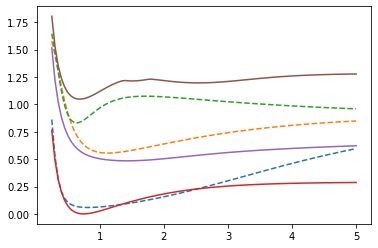

In [57]:
plt.plot(input_array, output_predict_test2, '--')
plt.plot(input_array,output_array,'-')

plt.show()